In [1]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("../All_Data/220304拿放水壺(坐著)/手2022-03-04 114800.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

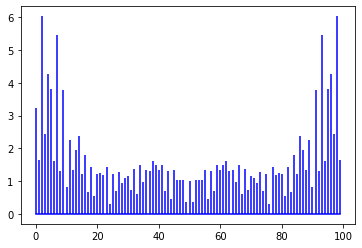

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


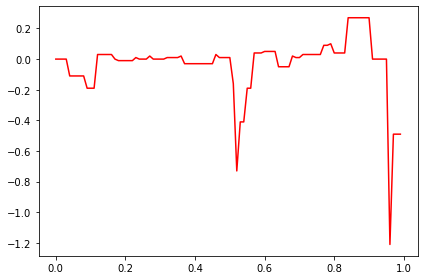

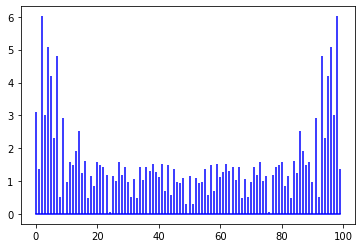

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


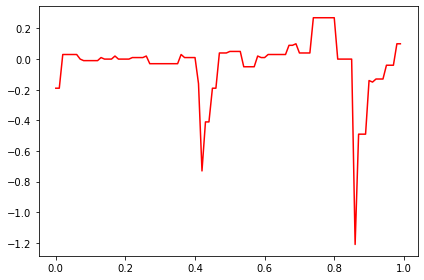

In [2]:
for i in range (0,20,10):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
    x=(data[start+i:start+i+sr,1])
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [3]:
print(Spectrum)

[array([3.23      , 1.65943642, 6.02993177, 2.42684202, 4.26228731,
       3.80611045, 1.6107022 , 5.44674979, 1.31633395, 3.79106534,
       0.82358044, 2.24676778, 1.32678538, 1.94974128, 2.36929767,
       1.21595896, 1.80051043, 0.66592205, 1.4460028 , 0.55114148,
       1.22341354, 1.24712052, 1.18354527, 1.438012  , 0.3091218 ,
       1.21593585, 0.68584645, 1.26386858, 0.93788421, 1.08973337,
       1.15213509, 0.73271325, 1.35968908, 0.60644358, 1.47715582,
       0.96642859, 1.34885815, 1.29680715, 1.62632956, 1.48069539,
       1.3245978 , 1.4967148 , 0.69664862, 1.31832535, 0.45699829,
       1.32890287, 1.03954052, 1.02702879, 1.03042289, 0.36052371,
       0.99      , 0.36052371, 1.03042289, 1.02702879, 1.03954052,
       1.32890287, 0.45699829, 1.31832535, 0.69664862, 1.4967148 ,
       1.3245978 , 1.48069539, 1.62632956, 1.29680715, 1.34885815,
       0.96642859, 1.47715582, 0.60644358, 1.35968908, 0.73271325,
       1.15213509, 1.08973337, 0.93788421, 1.26386858, 0.6858

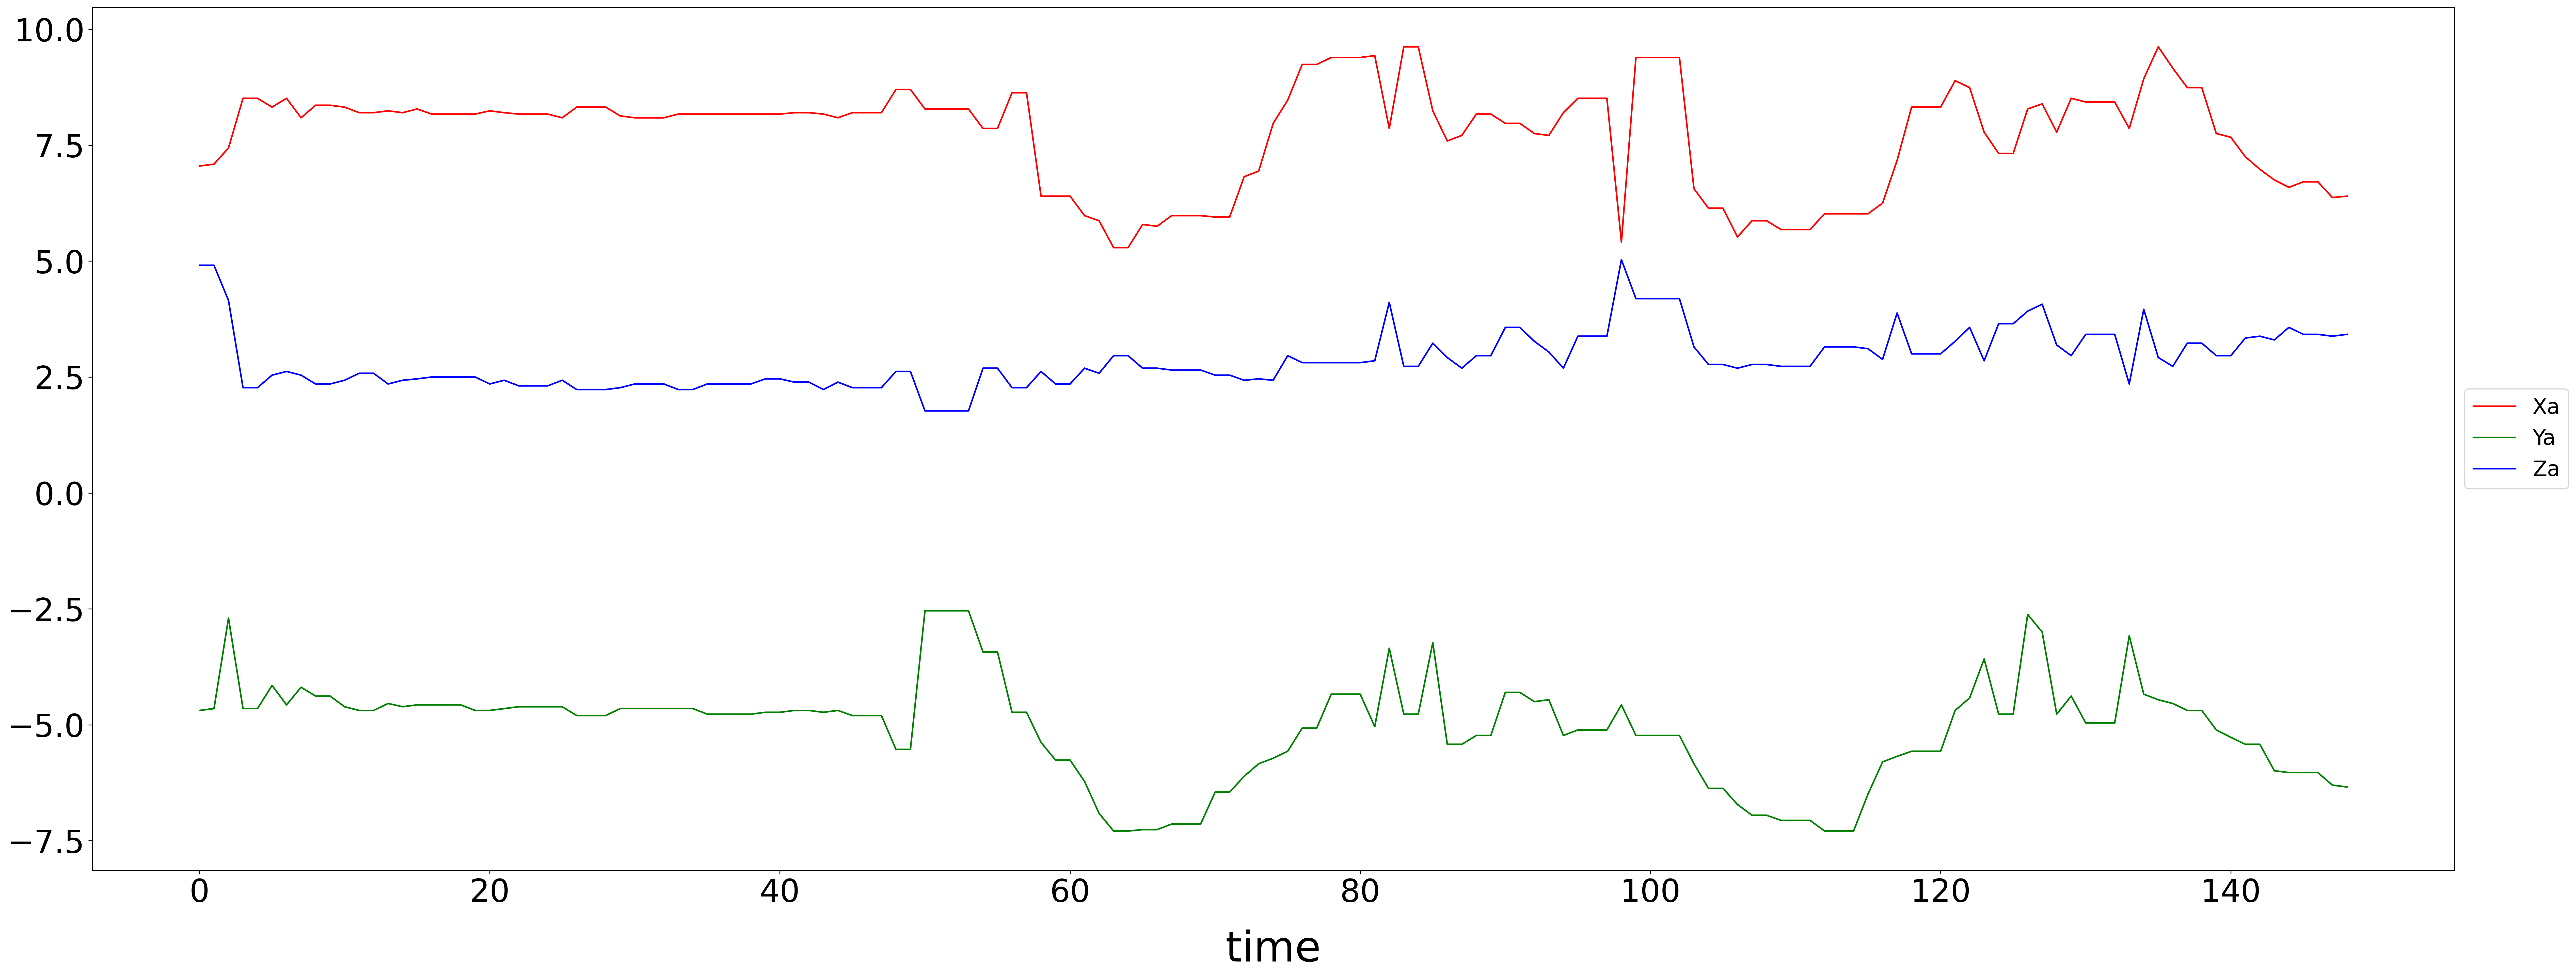

In [4]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,7], color = 'r', label = "Xa")
plt.plot(length, data[:,8], color = 'g', label = "Ya")
plt.plot(length, data[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21569/3517152436.py:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=149).
  plt.specgram(data[:,1],Fs=1,cmap='plasma')


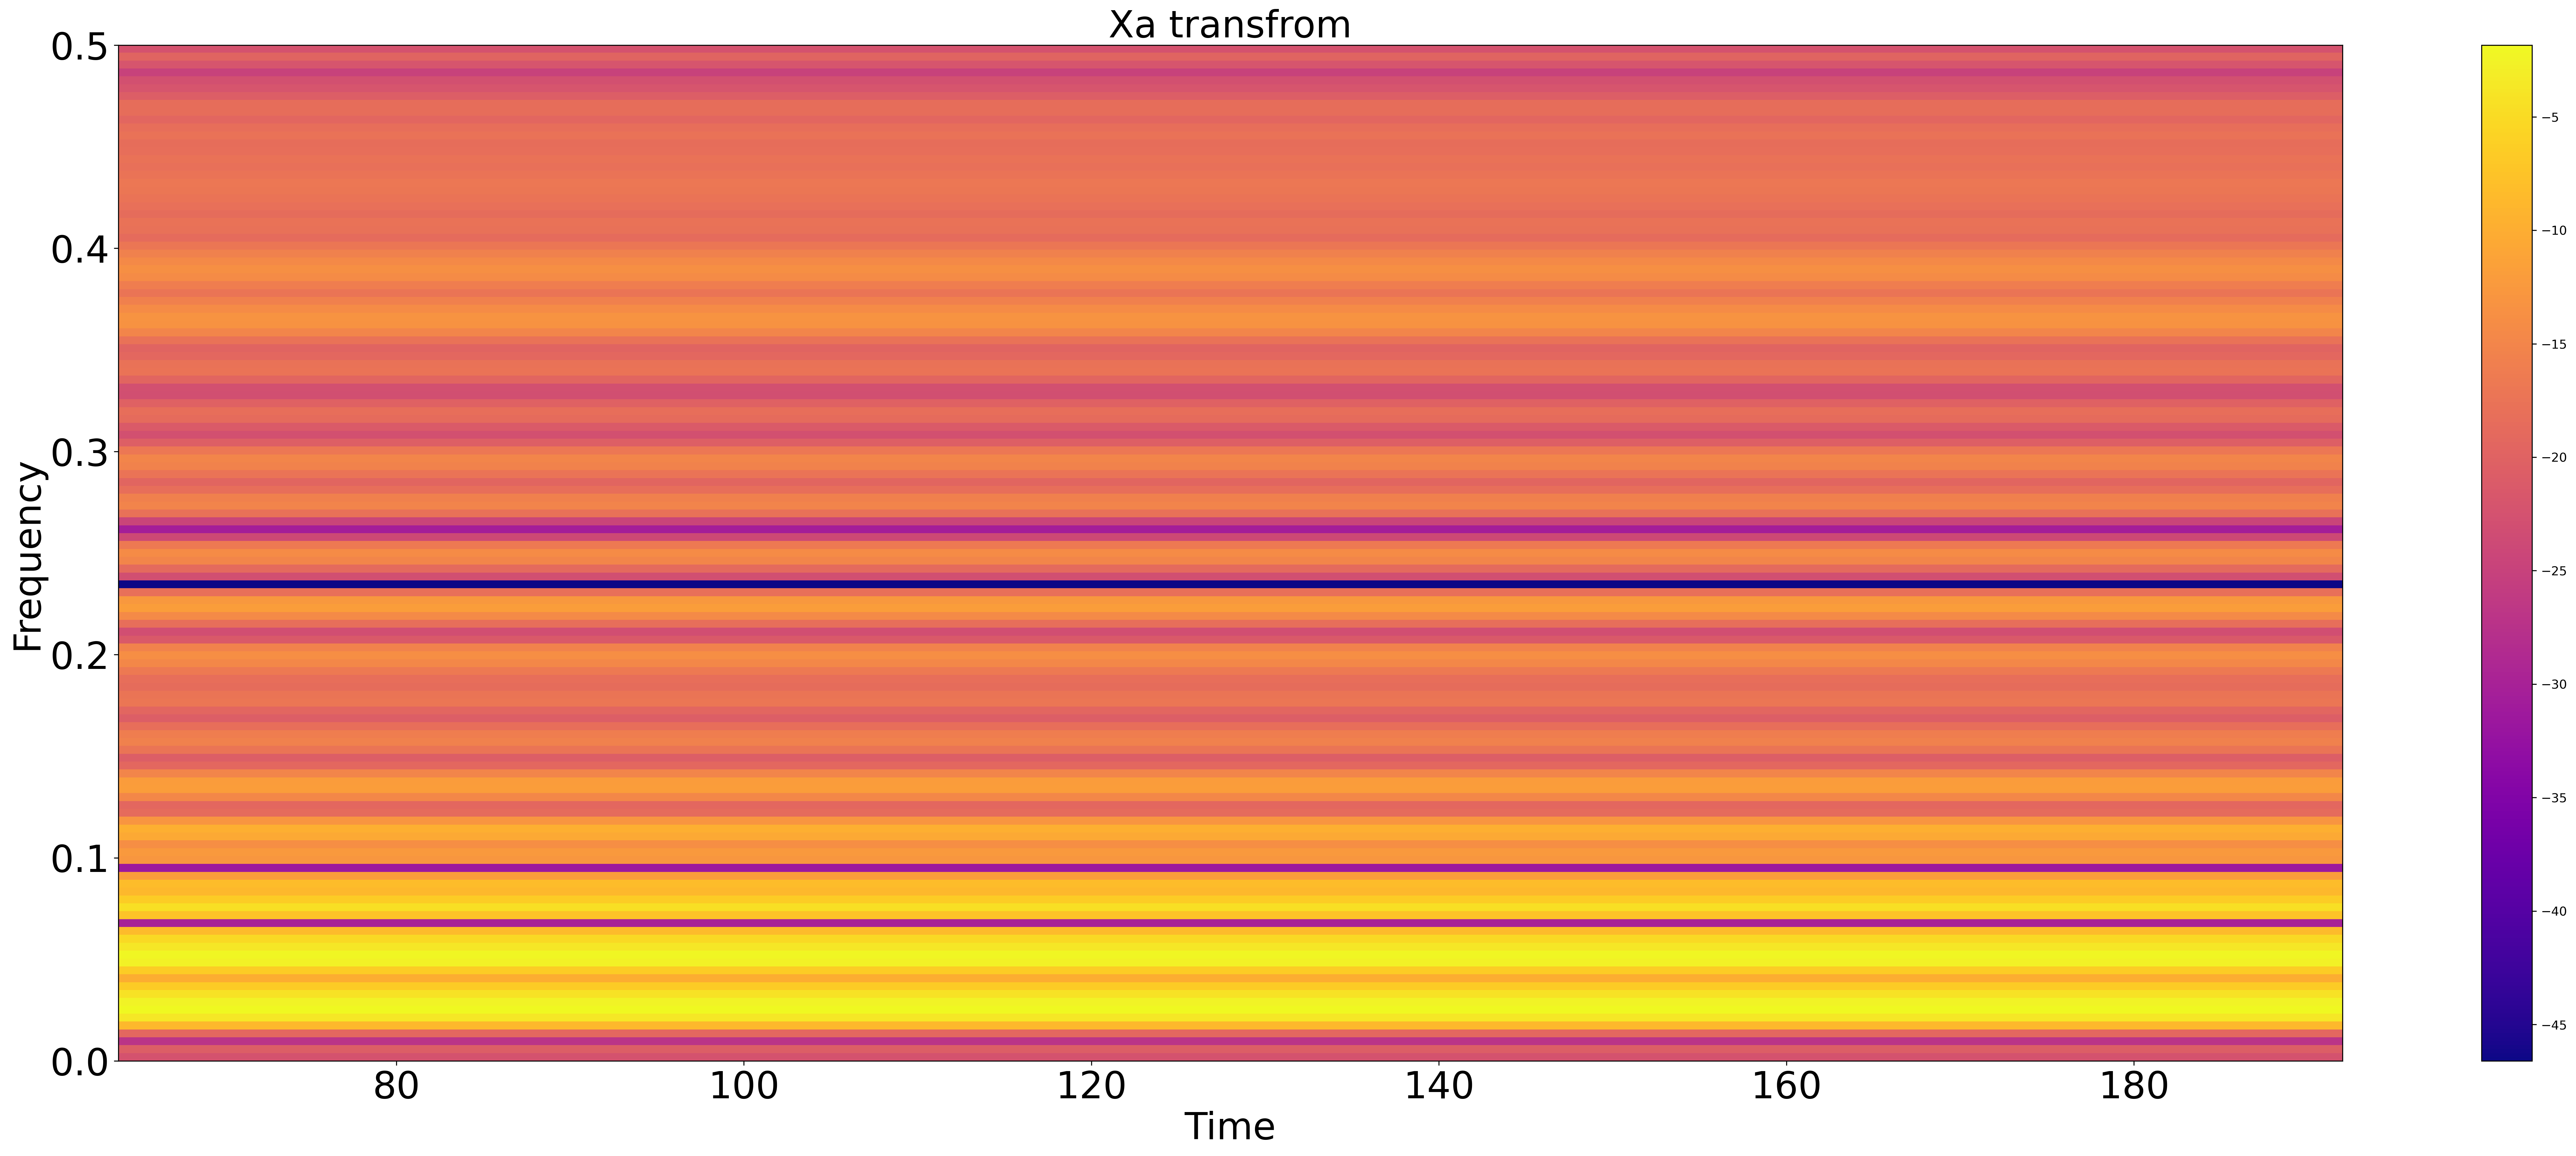

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21569/3517152436.py:24: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=149).
  plt.specgram(data[:,2])


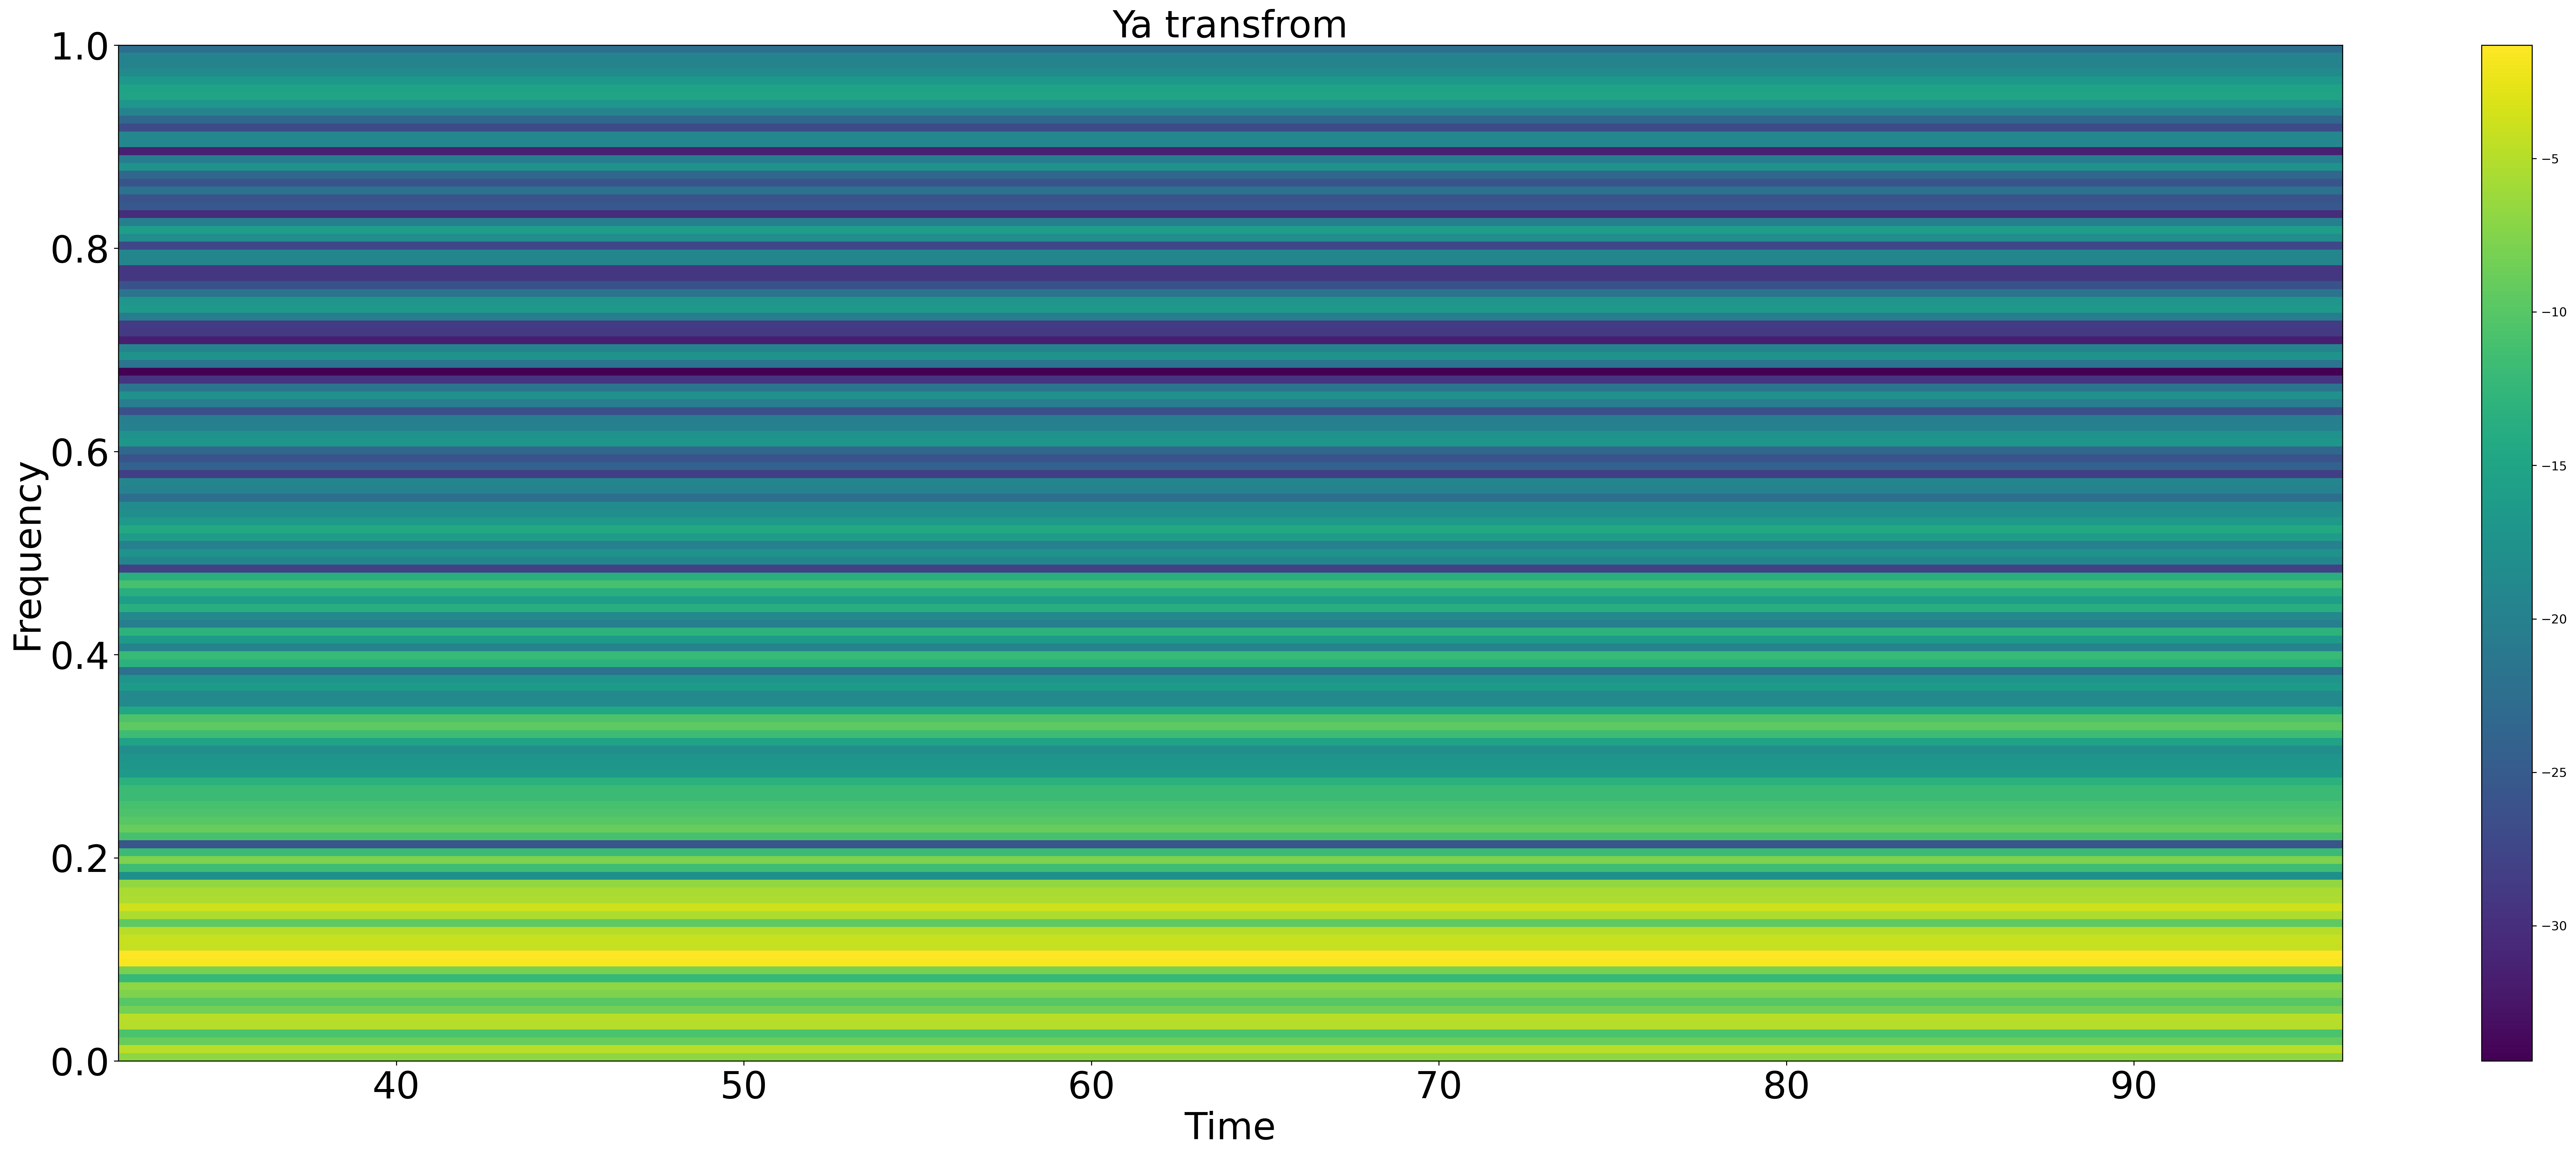

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21569/3517152436.py:34: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=149).
  plt.specgram(data[:,3])


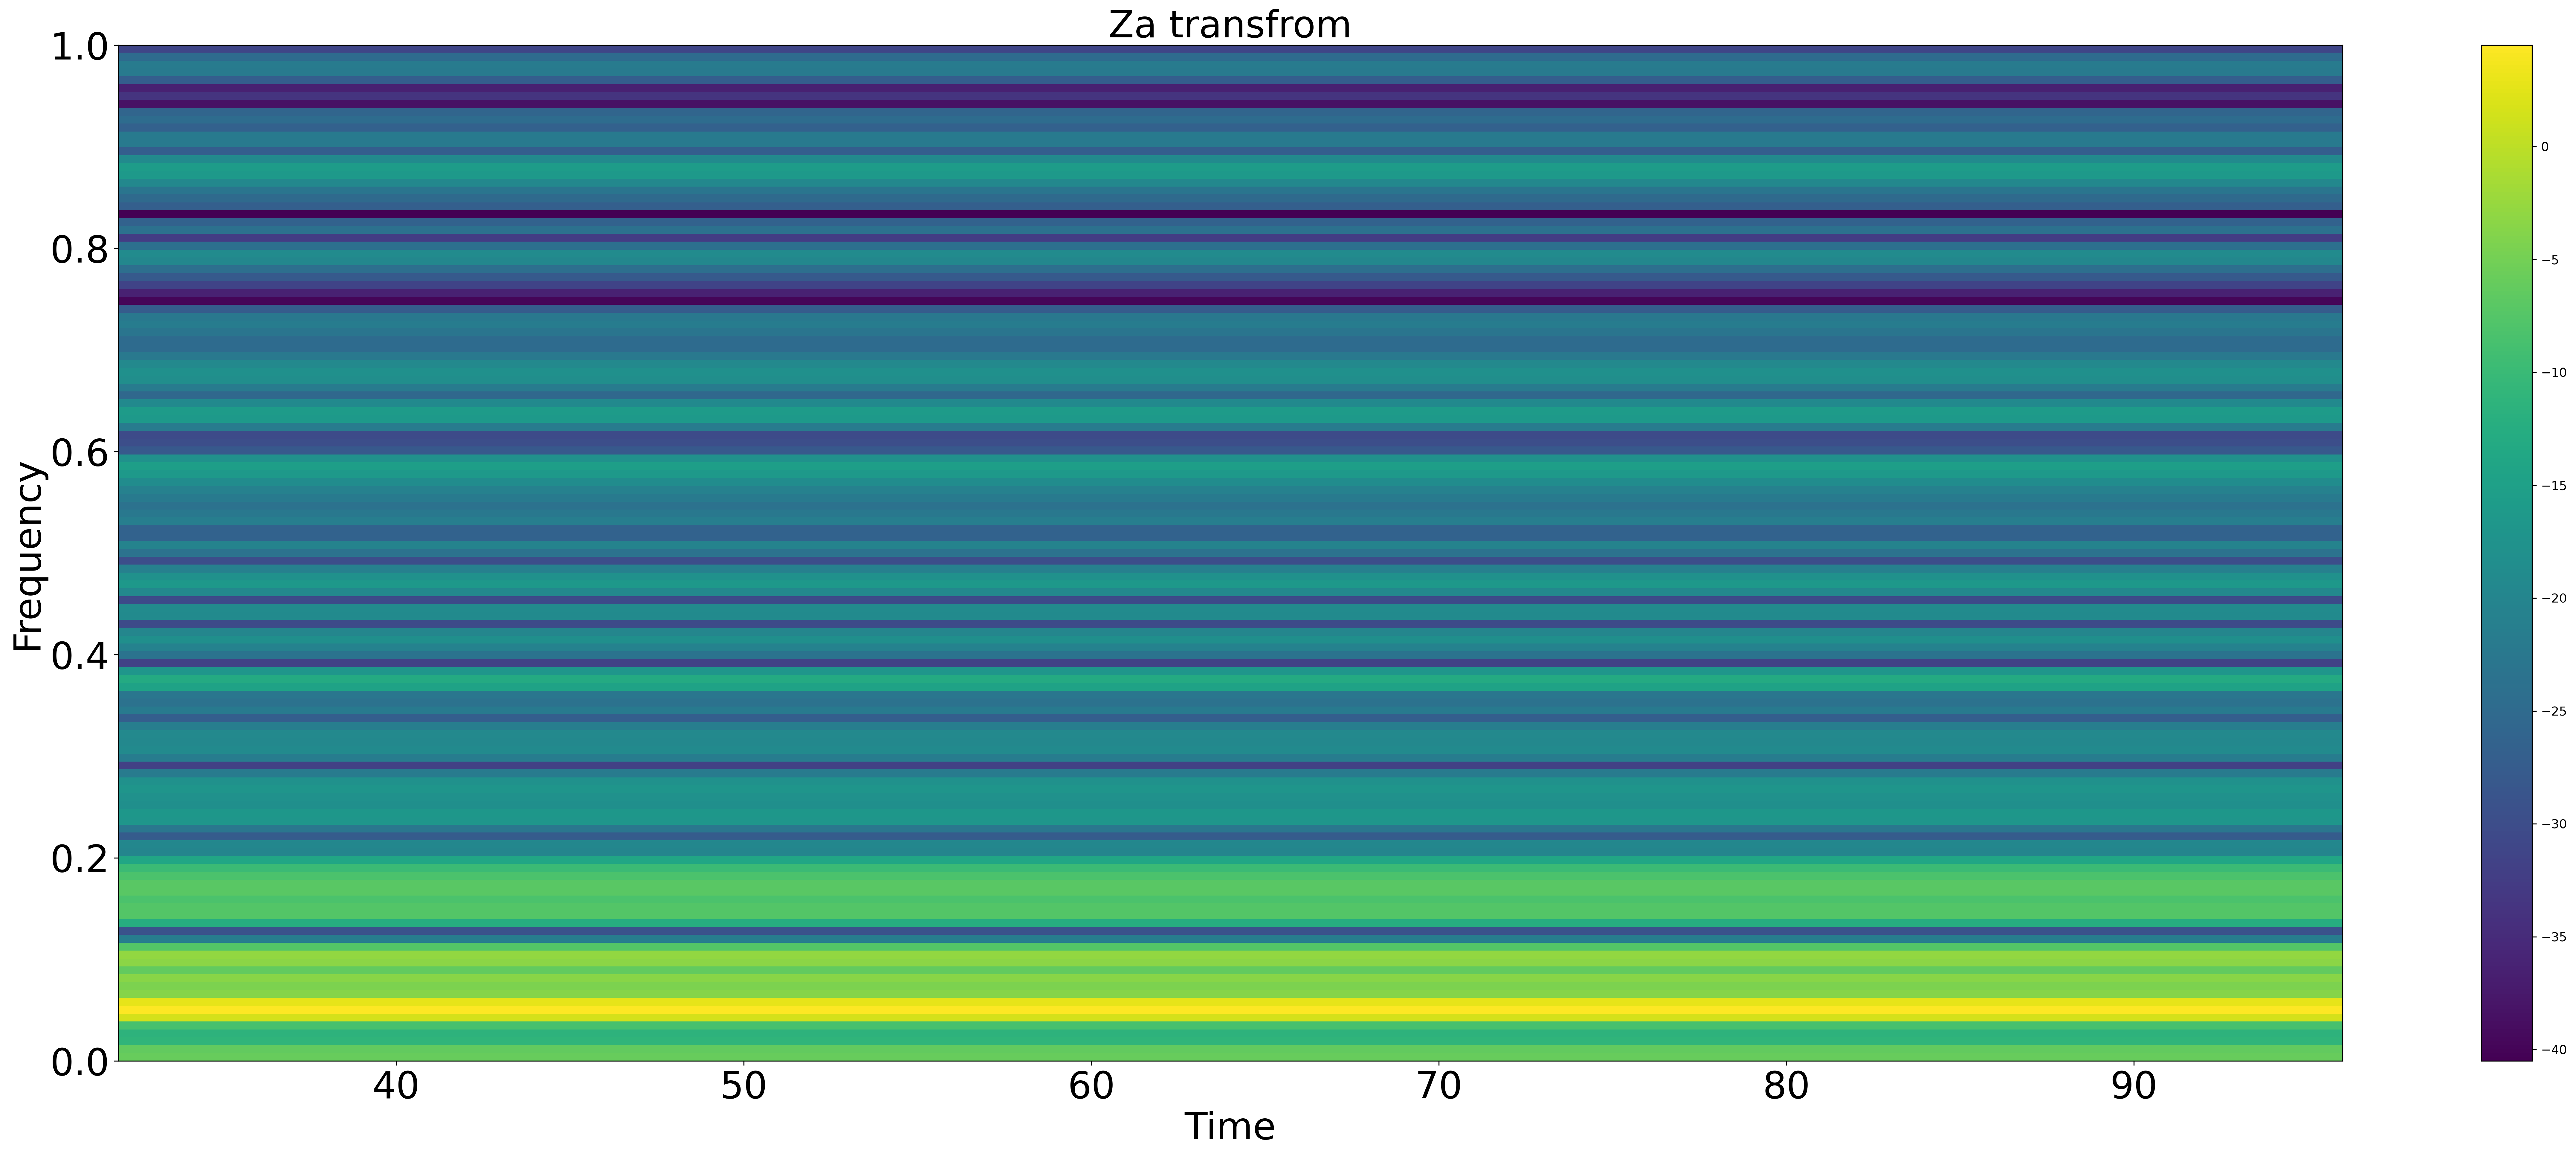

In [5]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,2])
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,3])
plt.colorbar()
plt.show()